## EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset

data = Dataset.load_builtin('ml-100k')

df = pd.read_csv("https://files.grouplens.org/datasets/movielens/ml-100k/u.data", sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

df.head()

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\lenovo/.surprise_data/ml-100k


,user_id,item_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [2]:
print("Basic statistics of the ratings:")
print(df.describe())

Basic statistics of the ratings:
            user_id        item_id         rating  \
count  100000.00000  100000.000000  100000.000000   
mean      462.48475     425.530130       3.529860   
min         1.00000       1.000000       1.000000   
25%       254.00000     175.000000       3.000000   
50%       447.00000     322.000000       4.000000   
75%       682.00000     631.000000       4.000000   
max       943.00000    1682.000000       5.000000   
std       266.61442     330.798356       1.125674   

                           timestamp  
count                         100000  
mean   1997-12-31 00:40:51.488619904  
min              1997-09-20 03:05:10  
25%       1997-11-13 19:18:29.500000  
50%              1997-12-22 21:42:24  
75%              1998-02-23 18:53:04  
max              1998-04-22 23:10:38  
std                              NaN  


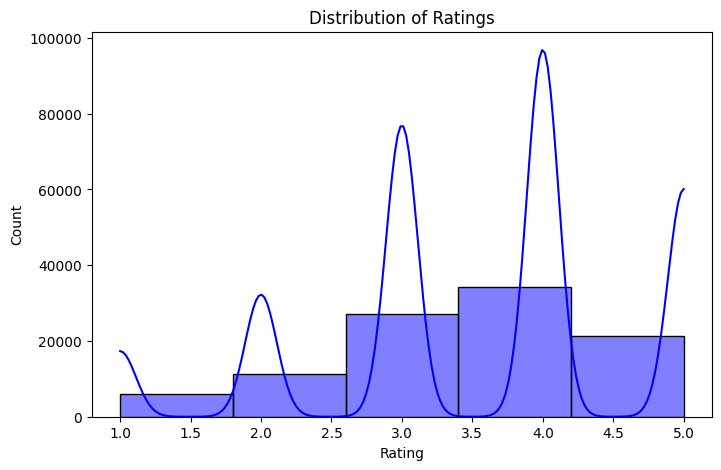

In [3]:
plt.figure(figsize=(8, 5))
sns.histplot(df["rating"], bins=5, kde=True, color="blue")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

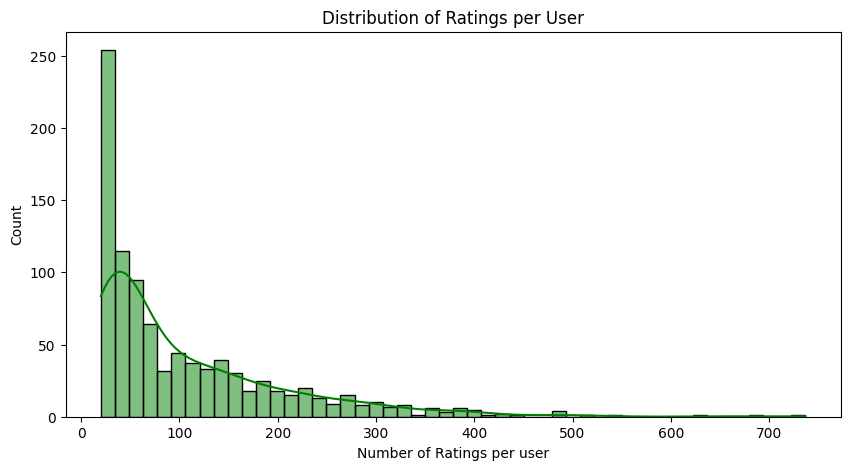

In [6]:
ratings_per_user = df["user_id"].value_counts()

plt.figure(figsize=(10, 5))
sns.histplot(ratings_per_user, bins=50, kde=True, color="green")
plt.xlabel("Number of Ratings per user")
plt.ylabel("Count")
plt.title("Distribution of Ratings per User")
plt.show()

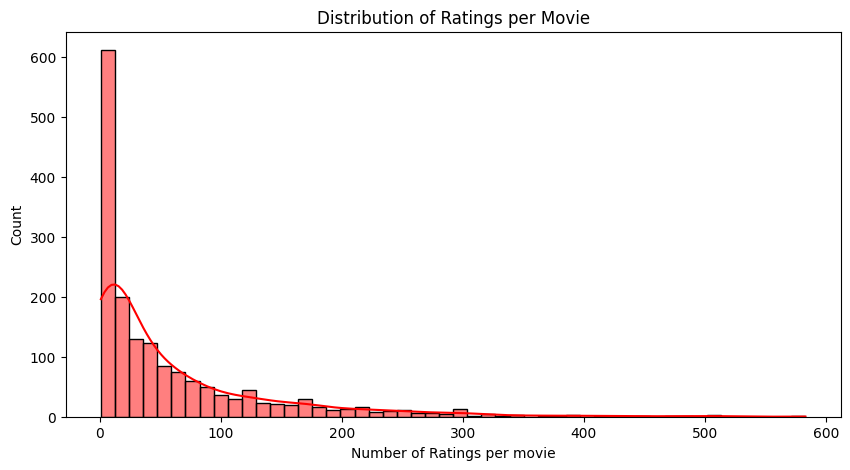

In [7]:
ratings_per_movie = df["item_id"].value_counts()

plt.figure(figsize=(10, 5))
sns.histplot(ratings_per_movie, bins=50, kde=True, color="red")
plt.xlabel("Number of Ratings per movie")
plt.ylabel("Count")
plt.title("Distribution of Ratings per Movie")
plt.show()

In [10]:
num_users = df["user_id"].nunique()
num_movies = df["item_id"].nunique()
num_interactions = len(df)

sparsity = 1 - num_interactions / (num_users * num_movies)

print(f"Sparsity of the dataset: {sparsity:.2%}")

Sparsity of the dataset: 93.70%


C:\Users\lenovo\AppData\Local\Temp\ipykernel_28896\471696799.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["year"], palette="Blues_r")


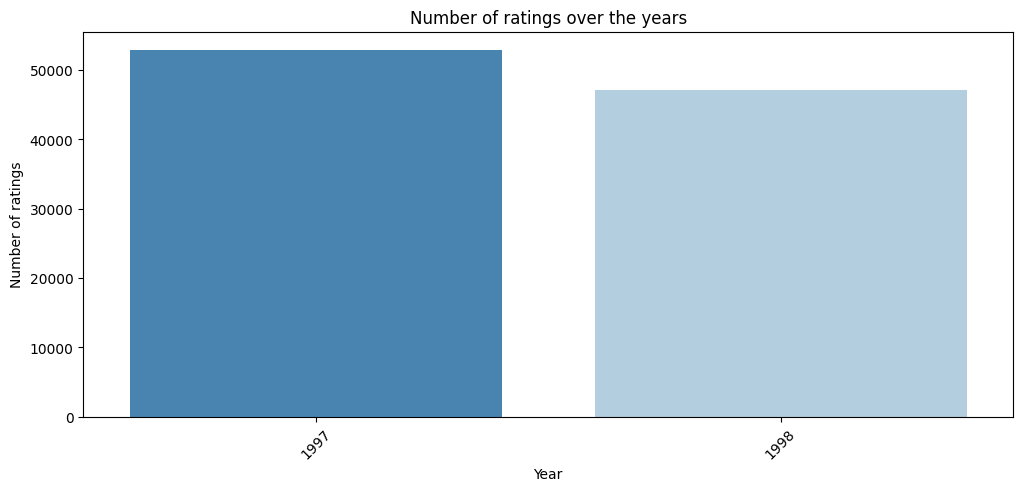

In [13]:
df["year"] = df["timestamp"].dt.year

plt.figure(figsize=(12, 5))
sns.countplot(x=df["year"], palette="Blues_r")
plt.xlabel("Year")
plt.ylabel("Number of ratings")
plt.title("Number of ratings over the years")
plt.xticks(rotation=45)
plt.show()

## Model

In [15]:
import numpy as np
from surprise import Reader, SVD, NMF
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse, mae

In [17]:
reader = Reader(line_format="user item rating timestamp", sep="\t", rating_scale=(1, 5))

file_path = "ml-100k/u.data"

data = Dataset.load_from_file(file_path, reader=reader)

In [18]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

### SVD

In [20]:
svd_model = SVD()
svd_model.fit(trainset)

predictions_svd = svd_model.test(testset)

print("SVD Performance:")
rmse_svd = rmse(predictions_svd)
mae_svd = mae(predictions_svd)

SVD Performance:
RMSE: 0.9411
MAE:  0.7424


### NMF

In [23]:
nmf_model = SVD()
nmf_model.fit(trainset)

predictions_nmf = nmf_model.test(testset)

print("NMF Performance:")
rmse_nmf = rmse(predictions_nmf)
mae_nmf = mae(predictions_nmf)

NMF Performance:
RMSE: 0.9364
MAE:  0.7365


### SVD vs NMF

In [24]:
results = pd.DataFrame({
    "Model": ["SVD", "NMF"],
    "RMSE": [rmse_svd, rmse_nmf],
    "MAE": [mae_svd, mae_nmf]
})

results

,Model,RMSE,MAE
0,SVD,0.941117,0.742422
1,NMF,0.936401,0.736523


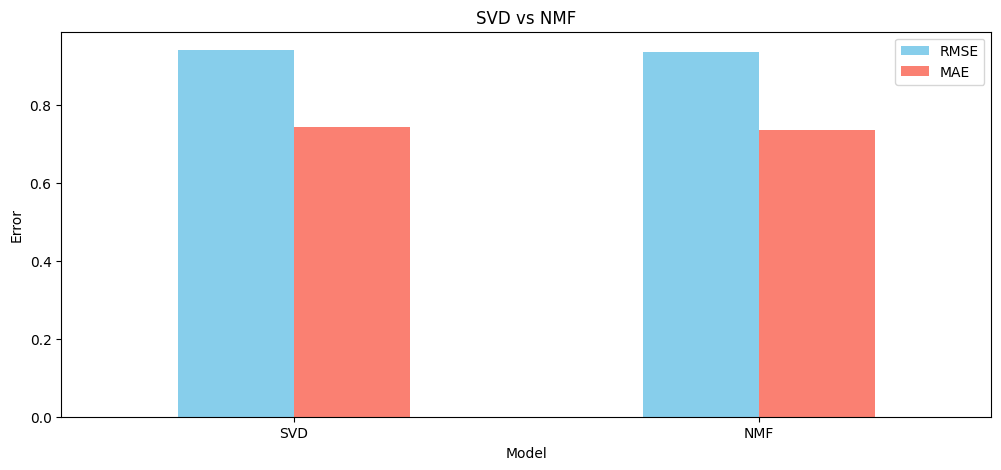

In [28]:
fig, ax = plt.subplots(figsize=(12, 5))
results.set_index("Model").plot(kind="bar", ax=ax, color=["skyblue", "salmon"])
plt.xlabel("Model")
plt.ylabel("Error")
plt.title("SVD vs NMF")
ax.legend(["RMSE", "MAE"], loc="upper right")  
plt.xticks(rotation=0)
plt.show()

### Hyperparameter Tuning

In [29]:
from surprise.model_selection import GridSearchCV

#### Define Hyperparameter Grids

In [ ]:
param_grid_svd = {
    'n_factors': [50, 100, 150, 200],
    'lr_all': [0.002, 0.005, 0.007, 0.01],
    'reg_all': [0.001, 0.02, 0.05, 0.1],
    'n_epochs': [20, 50, 100, 150]
}

param_grid_nmf = {
    'n_factors': [5, 10, 15, 20],
    'reg_pu': [0.005, 0.01, 0.02, 0.05, 0.1],
    'reg_qi': [0.005, 0.01, 0.02, 0.05, 0.1],;
    'n_epochs': [20, 50, 100, 150]
}

#### SVD GridSearch

In [58]:
grid_search_svd = GridSearchCV(SVD, param_grid_svd, measures=['rmse', 'mae'], cv=10, n_jobs=-1)
grid_search_svd.fit(data)

print("Best params for SVD:", grid_search_svd.best_params["rmse"])

Best params for SVD: {'n_factors': 150, 'lr_all': 0.005, 'reg_all': 0.1, 'n_epochs': 100}


#### NMF Gridsearch

In [59]:
grid_search_nmf = GridSearchCV(NMF, param_grid_nmf, measures=['rmse', 'mae'], cv=10, n_jobs=-1)
grid_search_nmf.fit(data)

print("Best params for NMF:", grid_search_nmf.best_params["rmse"])

Best params for NMF: {'n_factors': 20, 'reg_pu': 0.1, 'reg_qi': 0.1, 'n_epochs': 150}


#### Train

In [60]:
best_svd = SVD(**grid_search_svd.best_params["rmse"])
best_svd.fit(trainset)
predictions_svd_best = best_svd.test(testset)

best_nmf = NMF(**grid_search_nmf.best_params["rmse"])
best_nmf.fit(trainset)
predictions_nmf_best = best_nmf.test(testset)

#### Evaluate

In [61]:
print("Optimized SVD Performance:")
rmse_svd_best = rmse(predictions_svd_best)
mae_svd_best = mae(predictions_svd_best)

print("Optimized NMF Performance:")
rmse_nmf_best = rmse(predictions_nmf_best)
mae_nmf_best = mae(predictions_nmf_best)

Optimized SVD Performance:
RMSE: 0.9100
MAE:  0.7189
Optimized NMF Performance:
RMSE: 0.9265
MAE:  0.7341


### Before After

In [62]:
results_tuned = pd.DataFrame({
    "Model": ["SVD (Default)", "SVD (Tuned)", "NMF (Default)", "NMF (Tuned)"],
    "RMSE": [rmse_svd, rmse_svd_best, rmse_nmf, rmse_nmf_best],
    "MAE": [mae_svd, mae_svd_best, mae_nmf, mae_nmf_best]
})

results_tuned

,Model,RMSE,MAE
0,SVD (Default),0.941117,0.742422
1,SVD (Tuned),0.909978,0.718867
2,NMF (Default),0.936401,0.736523
3,NMF (Tuned),0.926488,0.734147


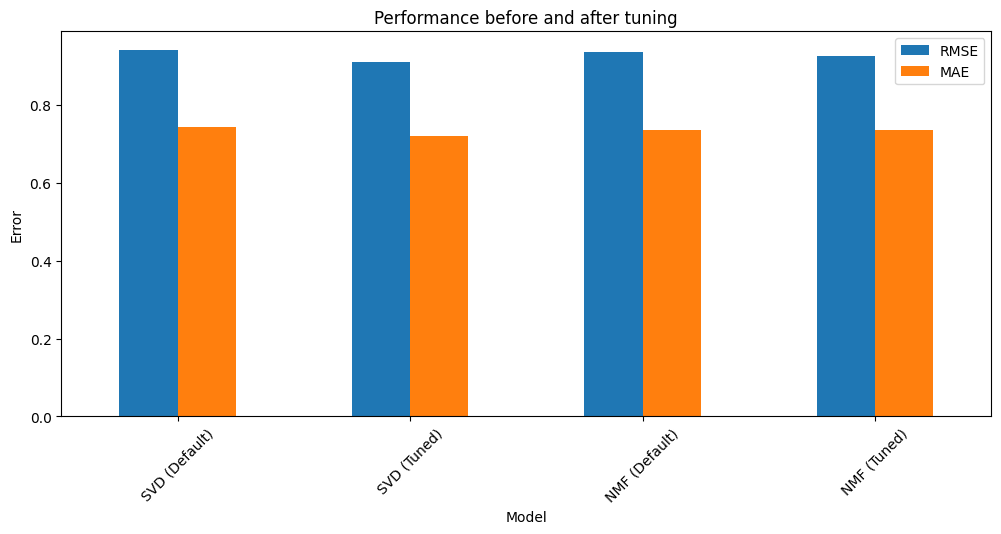

In [63]:
fig, ax = plt.subplots(figsize=(12, 5))
results_tuned.set_index("Model")[["RMSE", "MAE"]].plot(kind="bar", ax=ax)
plt.xlabel("Model")
plt.ylabel("Error")
plt.title("Performance before and after tuning")
ax.legend(["RMSE", "MAE"], loc="upper right")
plt.xticks(rotation=45)
plt.show()